# Summary

Training the iris data:
- Split the dataset into train set and test set: 80% train, 20% test
- Training without regularization
- Using regularization in training function
- Compare and give the conclusion


[L2 regularization](https://developers.google.com/machine-learning/glossary#l2-regularization)

A type of regularization that **penalizes** weights in proportion to the sum of the squares of the weights. L2 regularization helps drive outlier weights (those with high positive or low negative values) closer to 0 but _not quite_ to 0. Features with values very close to 0 remain in the model but don't influence the model's prediction very much.

L2 regularization always improves **generalization** in **linear models**.

Contrast with L1 regularization.

### Import libraries and load data

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

data = np.genfromtxt('../data/iris_regression.csv', delimiter=',', skip_header=1)

# get sepal (target - label)
sepal = data[:, 2]
print(sepal[:5])

# get all features
features = data [:, :2]
print(features[:5])


X_train, X_test, y_train, y_test = train_test_split(features, sepal, test_size=0.2, random_state=42)
N_train = len(y_train)

print(f"N_train = {N_train}")
print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"y_test shape = {y_test.shape}")

[5.1 4.9 4.7 4.6 5. ]
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
N_train = 40
X_train shape = (40, 2)
X_test shape = (10, 2)
y_train shape = (40,)
y_test shape = (10,)


## Without Regularization 

### Training process

In [42]:
# compute output and loss
def predict(x1, x2, w1, w2, b):
    return w1*x1 + w2*x2 + b

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b  = b - lr*dl_db
    return b

In [43]:
# initialize model's parameters
w1, w2, b = 5.0, -3.0, 0.0
print(w1, w2, b)

5.0 -3.0 0.0


In [49]:
epoch_max = 5000
lr = 0.01
losses = []

for epoch in range(epoch_max):
    # some variables
    loss_total = 0.0

    dw1_total = 0.0
    dw2_total = 0.0
    db_total  = 0.0

    for i in range(N_train):
        # get a sample
        x1 = X_train[i, 0] # column 1
        x2 = X_train[i, 1] # column 2
        y  = y_train[i] # label

        # compute output
        y_hat = predict(x1, x2, w1, w2, b)

        # compute loss
        loss = compute_loss(y, y_hat)
        loss_total = loss_total + loss

        # compute gradient w1, w2, w3, b
        dl_dw1 = compute_gradient_wi(x1, y, y_hat)
        dl_dw2 = compute_gradient_wi(x2, y, y_hat)
        dl_db  = compute_gradient_b(y, y_hat)

        # accumulate
        dw1_total = dw1_total + dl_dw1
        dw2_total = dw2_total + dl_dw2
        db_total = db_total + dl_db


    # (after processing N samples) - update parameters
    w1 = update_weight_wi(w1, dl_dw1 / N_train, lr)
    w2 = update_weight_wi(w2, dl_dw2 / N_train, lr)
    b  = update_weight_b(b, dl_db / N_train, lr)

    # logging
    losses.append(loss_total / N_train)

# after training
print(w1, w2, b)

4.2857151207453805 -3.109889981423779 -0.5494499071189023


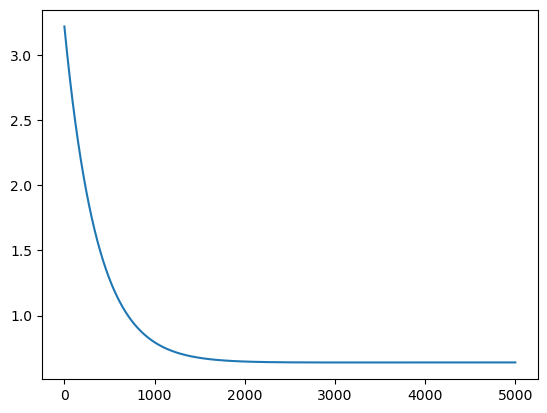

In [45]:
plt.plot(losses)
plt.show()

### Evaluation
Compute prediction and MSE for train and test model

In [54]:
y_train_predict = []
for i in range(len(X_train)):
    x1 = X_train[i, 0] # column 1
    x2 = X_train[i, 1] # column 2
    y_hat = predict(x1, x2, w1, w2, b)
    y_train_predict.append(y_hat)
    # y_train: label

mse_train_loss = np.mean(compute_loss(y_hat=np.array(y_train_predict), y=y_train))
print(f"mse_train_loss = {mse_train_loss}")

y_test_predict = []
for i in range(len(X_test)):
    x1_test = X_test[i, 0] # column 1
    x2_test = X_test[i, 1] # column 2
    y_hat = predict(x1_test, x2_test, w1, w2, b)
    y_test_predict.append(y_hat)
    # y_test: label
mse_test_loss = np.mean(compute_loss(y_hat=np.array(y_test_predict), y=y_test))
print(f"mse_test_loss = {mse_test_loss}")

mse_train_loss = 0.6410436629713822
mse_test_loss = 0.2062502900099929


## Regularization

### Training process

In [66]:
#lambda regularization l2
lambda_l2 = 0.03

# compute output and loss
def predict(x1, x2, w1, w2, b):
    return w1*x1 + w2*x2 + b

def compute_loss(y_hat, y, w1, w2, lambda_l2 = 0.03):
    return (y_hat - y)**2 + lambda_l2 * (w1**2 + w2**2)

# compute gradient
def compute_gradient_wi(xi, y, y_hat, wi, lambda_l2 = 0.03):
    dl_dwi = 2*xi*(y_hat-y) + 2 * lambda_l2 * wi
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b  = b - lr*dl_db
    return b

In [67]:
# initialize model's parameters
w1, w2, b = 5.0, -3.0, 0.0
print(w1, w2, b)

5.0 -3.0 0.0


In [68]:
epoch_max = 100000
lr = 0.01
losses = []

for epoch in range(epoch_max):
    # some variables
    loss_total = 0.0

    dw1_total = 0.0
    dw2_total = 0.0
    db_total  = 0.0

    for i in range(N_train):
        # get a sample
        x1 = X_train[i, 0]
        x2 = X_train[i, 1]
        y  = y_train[i]

        # compute output
        y_hat = predict(x1, x2, w1, w2, b)

        # compute loss
        loss = compute_loss(y, y_hat, w1, w2, lambda_l2)
        loss_total = loss_total + loss

        # compute gradient w1, w2, w3, b
        dl_dw1 = compute_gradient_wi(x1, y, y_hat, w1, lambda_l2)
        dl_dw2 = compute_gradient_wi(x2, y, y_hat, w2, lambda_l2)
        dl_db  = compute_gradient_b(y, y_hat)

        # accumulate
        dw1_total = dw1_total + dl_dw1
        dw2_total = dw2_total + dl_dw2
        db_total = db_total + dl_db


    # (after processing N samples) - update parameters
    w1 = update_weight_wi(w1, dl_dw1/N_train, lr)
    w2 = update_weight_wi(w2, dl_dw2/N_train, lr)
    b  = update_weight_b(b, dl_db/N_train, lr)

    # logging
    losses.append(loss_total/N_train)

# after training
print(w1, w2, b)

2.264920305436631 -0.4925703257969943 1.5227187239097226


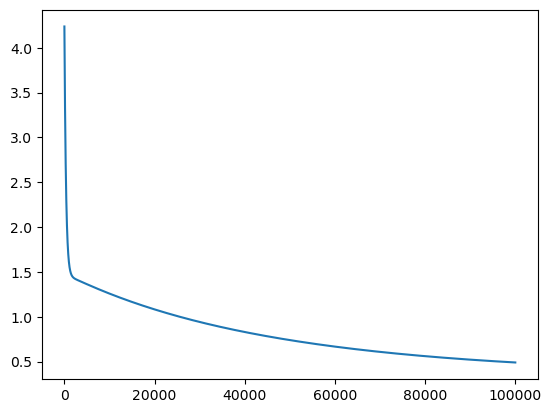

In [70]:
plt.plot(losses)
plt.show()

### Evaluation
Compute prediction and MSE for train and test model

In [74]:
y_train_predict = []
for i in range(len(y_train)):
    x1 = X_train[i, 0] # column 1
    x2 = X_train[i, 1] # column 2
    y_hat = predict(x1, x2, w1, w2, b)
    y_train_predict.append(y_hat)
    # y_train: label
mse_train_loss = np.mean((np.array(y_train_predict) - y_train) ** 2)
print(f"mse_train_loss = {mse_train_loss}")

y_test_predict = []
for i in range(len(X_test)):
    x1_test = X_test[:, 0] # column 1
    x2_test = X_test[:, 1] # column 2
    y_hat = predict(x1_test, x2_test, w1, w2, b)
    y_test_predict.append(y_hat)
    # y_test: label
mse_test_loss = np.mean((np.array(y_test_predict) - y_test) ** 2)
print(f"mse_test_loss = {mse_test_loss}")

mse_train_loss = 0.32900680836860535
mse_test_loss = 0.10725133966503453


## Conclusion

Loss reduce more when using regularization